In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\nasty\Downloads\Telegram Desktop\sc.csv')
df

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
1,2022-01-23 11:09:22,4,110,309,325757,60500835
2,2022-01-24 19:40:03,1,10,891,986730,43230531
3,2022-01-14 18:01:22,5,70,749,868648,46180789
4,2022-01-19 22:32:43,2,10,469,863523,59266169
...,...,...,...,...,...,...
26052,2022-01-04 05:21:39,4,10,763,182587,85041983
26053,2022-01-18 14:43:12,3,60,790,187031,47894568
26054,2022-01-26 18:08:02,1,90,502,247419,75350869
26055,2022-01-18 05:55:09,2,80,418,474601,79438423


In [155]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date
df_days = df.loc[df['day'] != 1]
df_grouped = df_days.groupby('day')['order_id'].count()
df_sorted = df_grouped.sort_values(ascending=False)
top5_days = df_sorted.head(5)
top5_days

day
2022-01-01    3506
2022-01-27     794
2022-01-24     793
2022-01-26     792
2022-01-03     785
Name: order_id, dtype: int64

In [156]:
df['date'] = pd.to_datetime(df['date'])
df['dt2'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

df_january = df.loc[df['date'].dt.month == 1]

In [157]:
grouped_data = df_january.groupby(df_january['date'].dt.day)

df_day = df_january.loc[df_january['date'].dt.day == 1] 

jan1_data = df_january[df_january['date'].dt.day == 1]

! Количество order_price == 0 за весь январь и за 01.01.2020 одинаковое => 01.01.2020 скорее всего был какой то сбой, вызвавший ошибочные значения

In [94]:
len(df_january[df_january['order_price'] == 0])

2754

In [95]:
len(jan1_data[jan1_data['order_price'] == 0])

2754

# 1) У всех ли order_price == 0?
Посмотрим распределение order_price в течение 1.01.2020

Видим, что не все order_price 1.01.2020 == 0.

In [9]:
jan1_data.head(10)

,date,cutlery,tips,order_price,uid,order_id,dt2
6,2022-01-01 08:52:23,4,0,0,779134,15841612,2022-01-01
7,2022-01-01 06:21:14,6,0,0,751242,83957554,2022-01-01
26,2022-01-01 19:51:35,4,0,0,307676,43056019,2022-01-01
49,2022-01-01 21:58:31,5,0,0,741562,51847053,2022-01-01
54,2022-01-01 16:07:42,5,0,0,806167,49572522,2022-01-01
61,2022-01-01 14:22:12,5,0,0,591476,75539071,2022-01-01
67,2022-01-01 06:42:52,6,0,0,520889,93339208,2022-01-01
82,2022-01-01 07:56:22,4,20,620,983448,75785590,2022-01-01
83,2022-01-01 07:39:41,4,0,0,994796,43661893,2022-01-01
93,2022-01-01 01:00:41,5,0,0,246892,87751572,2022-01-01


In [101]:
jan1_data['order_price'].value_counts()

0      2754
710       5
731       4
610       4
640       4
       ... 
314       1
916       1
484       1
305       1
490       1
Name: order_price, Length: 505, dtype: int64

<AxesSubplot:xlabel='date', ylabel='order_price'>

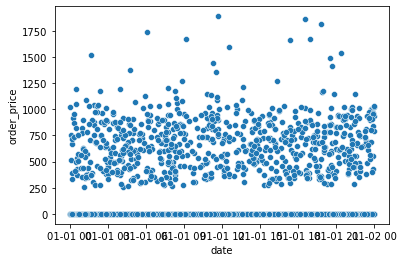

In [10]:
sns.scatterplot(x="date", y="order_price", data = jan1_data)

# 2) Какой процент таких заказов за весь январь?
Считаем процент order_price == 0 от общего кол-ва order_price за январь

In [11]:
100 * len(df_january[df_january['order_price'] == 0]) / len(df_january['order_price'])

10.569136892197873

# 3) Найти, в какие дни у нас есть заказы с ценой == 0

подтверждение того, что все заказы с order_price == 0 произошли 01.01.2020

In [12]:
df_january[df_january['order_price'] == 0]

,date,cutlery,tips,order_price,uid,order_id,dt2
6,2022-01-01 08:52:23,4,0,0,779134,15841612,2022-01-01
7,2022-01-01 06:21:14,6,0,0,751242,83957554,2022-01-01
26,2022-01-01 19:51:35,4,0,0,307676,43056019,2022-01-01
49,2022-01-01 21:58:31,5,0,0,741562,51847053,2022-01-01
54,2022-01-01 16:07:42,5,0,0,806167,49572522,2022-01-01
...,...,...,...,...,...,...,...
26017,2022-01-01 10:44:21,4,0,0,107130,10564056,2022-01-01
26035,2022-01-01 08:39:20,5,0,0,892785,78217751,2022-01-01
26040,2022-01-01 02:29:59,4,0,0,776175,23958667,2022-01-01
26042,2022-01-01 02:51:01,5,0,0,904144,17789596,2022-01-01


# 4) Топ 100 пользователей, которые пользуются доставкой

In [13]:
df_january['uid'].value_counts()[:100]

540487    13
260478    11
375405    11
509314    11
158480    10
          ..
936369     7
810902     7
288901     7
105283     7
480602     7
Name: uid, Length: 100, dtype: int64

# 5) Топ 10 пользователей, которые заказывают больше всего столовых приборов?

In [14]:
df_january.groupby(['uid'])['cutlery'].sum().sort_values(ascending=False)[:10]

uid
540487    52
375405    41
509314    37
260478    37
158480    35
463468    33
800675    33
841414    32
131564    32
664498    32
Name: cutlery, dtype: int64

# 6) Топ 20 пользователей, оставивших чаевые

In [114]:
df.groupby(['uid'])['order_price'].sum().sort_values(ascending=False)[:20]

uid
540487    7742
983063    6383
733293    6336
480081    6278
699530    6068
509314    6051
826714    6010
463654    5978
633000    5978
420988    5962
361102    5924
218322    5905
112472    5881
942480    5866
500277    5831
696494    5825
598488    5818
259133    5812
966508    5806
442185    5800
Name: order_price, dtype: int64

In [109]:
df_january.groupby(['uid'])['tips'].sum().sort_values(ascending=False)[:20]

uid
540487    980
260478    680
509314    670
375405    660
652620    650
437801    620
323227    620
960324    620
415022    620
463654    620
757336    610
852397    610
923813    610
857669    610
253222    610
401983    610
341681    610
578890    610
755822    610
884410    610
Name: tips, dtype: int64

# 7) топ 20 дней, когда чаевых было  больше всего? 

In [16]:
df_january.groupby(['dt2'])['tips'].sum().sort_values(ascending=False)[:20]

dt2
2022-01-26    55290
2022-01-27    54560
2022-01-01    54390
2022-01-24    53760
2022-01-25    53030
2022-01-02    53000
2022-01-05    52700
2022-01-31    52600
2022-01-16    52220
2022-01-12    52200
2022-01-17    51800
2022-01-30    51700
2022-01-07    51470
2022-01-08    51410
2022-01-28    51370
2022-01-03    51230
2022-01-21    51210
2022-01-29    51150
2022-01-06    51100
2022-01-20    51050
Name: tips, dtype: int64

# 8) Какое количество столовых приборов пользуется популярностью?

In [17]:
df_january['cutlery'].value_counts()

4    6552
3    5552
2    4869
1    4068
5    3442
6    1574
Name: cutlery, dtype: int64

4 -    6552

# 9) Сколько пользователей в этих данных?

In [103]:
df_january['uid'].nunique()

6433

# 10) Частота осуществления заказов в течение времени суток

In [125]:
df['hours'] = df['date'].dt.hour
i1 = df['hours'].between(5, 11)
ii1 = df[i1]['hours'].count()
c1 = sum(df['order_price'].value_counts())
i2 = df['hours'].between(12, 16)
ii2 = df[i2]['hours'].count()
c2 = sum(df['order_price'].value_counts())
i3 = df['hours'].between(17, 23)
i3 = df[i3]['hours'].count()
i4 = df['hours'].between(0, 4)
i4 = df[i4]['hours'].count()
df2 = pd.DataFrame({'interval': ['05:00-12:00', '12:00-17:00', '17:00-00:00','00:00-05:00'], 'count': [ii1,ii2,i3,i4], 'profit': [c1, c2,0,0]})
df2

,interval,count,profit
0,05:00-12:00,7753,26057
1,12:00-17:00,5288,26057
2,17:00-00:00,7635,0
3,00:00-05:00,5381,0


# 11) Топ-10 пользователей, которые потратили наибольшее количество денег в сервисе


In [160]:
exp = df.groupby(['uid'])['order_price'].sum().sort_values(ascending=False)[:10]
exp

uid
540487    7742
983063    6383
733293    6336
480081    6278
699530    6068
509314    6051
826714    6010
463654    5978
633000    5978
420988    5962
Name: order_price, dtype: int64

# 12) Топ 5 дней, в которые было больше всего заказов? (вывести день и количество заказов)

In [164]:
df['date'] = df['date'].dt.date
df.groupby(['date'])['order_id'].nunique().sort_values(ascending=False)[:30]

date
2022-01-01    3048
2022-01-26     762
2022-01-03     753
2022-01-27     753
2022-01-24     752
2022-01-25     737
2022-01-02     734
2022-01-21     733
2022-01-05     730
2022-01-17     729
2022-01-22     725
2022-01-07     723
2022-01-30     721
2022-01-14     721
2022-01-31     718
2022-01-15     718
2022-01-08     711
2022-01-29     708
2022-01-04     708
2022-01-20     701
2022-01-06     701
2022-01-16     701
2022-01-09     700
2022-01-12     697
2022-01-13     694
2022-01-23     691
2022-01-28     691
2022-01-18     689
2022-01-11     687
2022-01-19     671
Name: order_id, dtype: int64